# Foundations of Data Science Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe. In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima tribe. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima Diabetes Analysis by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)

##  Importing the necessary libraries 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the given dataset 

In [2]:
pima = pd.read_csv ("diabetes.csv")

## Showing the last 10 records of the dataset

In [3]:
pima.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,20,79,37.5,0.197,26,0
759,6,190,92,20,79,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,79,44.0,0.403,43,1
762,9,89,62,20,79,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,79,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,79,30.1,0.349,47,1
767,1,93,70,31,79,30.4,0.315,23,0


There are 9 columns 

## Showing the first 10 records of the dataset 

In [4]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.600000,0.627,50,1
1,1,85,66,29,79,26.600000,0.351,31,0
2,8,183,64,20,79,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,20,79,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,69,20,79,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,20,79,31.992578,0.232,54,1


## Finding the dimension of the `pima` dataframe. 

In [5]:
pima.shape

(768, 9)

The dataset's dimensions indicate the number of rows and columns it contains, providing insights into the amount of data you'll be handling.

## Finding the size of the `pima` dataframe

In [6]:
pima.size

6912

The size of a dataset is determined by the total number of elements it contains, which is calculated by multiplying the number of rows by the number of columns in a dataframe.

## Finding the data types of all the variables in the data set

In [7]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies               integer 
Glucose                   integer  
BloodPressure             integer
SkinThickness             integer  
Insulin                   integer  
BMI                       float
DiabetesPedigreeFunction  float
Age                       integer  
Outcome 

## Checking for missing values in the `pima` dataframe

In [8]:
pima.isnull().values.any()

False

A missing value, often represented by NaN (Not a Number), indicates data that is absent from the dataframe. The method isnull().values.any() checks for missing values within a column or row, returning True if any are found and False if none are present. In this instance, the dataset contains no missing values.

## Finding the summary statistics for all variables except 'Outcome' in the `pima` dataframe

In [9]:
pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.450805,0.471876,33.240885
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


A summary statistic provides information about our sample data. Using them, we can determine where our data is located, trends in our data, etc. 
For Example, 

Variable: Pregnancies

count: 768.000000 is the number of non-empty values.
mean: 3.845052 is the average (mean) value.
std: 3.369578 is the standard deviation.
min: 0.000000 is the minimum value.
25%: 1.000000 is the 25% percentile (Q1).
50%: 3.000000 is the 50% percentile (median).
75%: 6.000000 is the 75% percentile (Q3).
max: 17.000000 is The maximum value.


## Plotting the distribution for the variable 'BloodPressure'

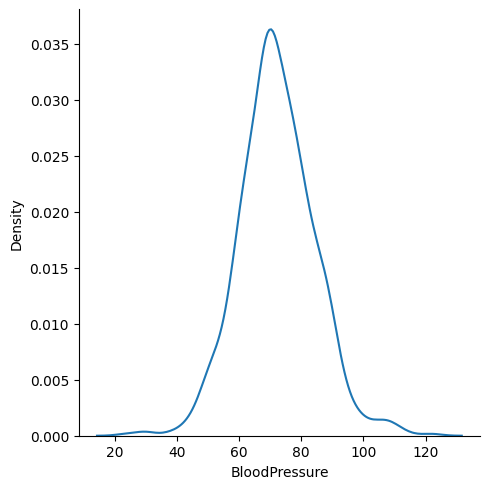

In [10]:
sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

The plot illustrates a normal distribution of the data, indicating that blood pressure measurements clustered around the mean are more prevalent than those further from the mean.

## The 'BMI' of the person having the highest 'Glucose'

In [11]:
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

The 'BMI' of the person having the highest 'Glucosa' is 42.9

## Mean, Median, and Mode of the variable 'BMI'

In [12]:
m1 = pima['BMI'].mean()  # mean
print(m1)
m2 = pima['BMI'].median()  # median
print(m2)
m3 = pima['BMI'].mode()[0]  # mode
print(m3)

32.45080515543619
32.0
32.0


The mean, median, and mode of the 'BMI' variable are approximately equal (32.45, 32.0, and 32.0 respectively), indicating a symmetric distribution. While they are not exactly equal, their proximity suggests a normal distribution in the analysis of the 'BMI' variable.

## Finding the women's 'Glucose' levels which are above the mean level of 'Glucose'

In [13]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

343

## Women with 'BloodPressure' Equal to Median and 'BMI' Less than Median

In [14]:
pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
14,5,166,72,19,175,25.8,0.587,51,1
93,4,134,72,20,79,23.8,0.277,60,1
103,1,81,72,18,40,26.6,0.283,24,0
205,5,111,72,28,79,23.9,0.407,27,0
299,8,112,72,20,79,23.6,0.840,58,0
325,1,157,72,21,168,25.6,0.123,24,0
330,8,118,72,19,79,23.1,1.476,46,0
366,6,124,72,20,79,27.6,0.368,29,1
380,1,107,72,30,82,30.8,0.821,24,0
393,4,116,72,12,87,22.1,0.463,37,0


## Pairplot of Glucose, SkinThickness, and DiabetesPedigreeFunction

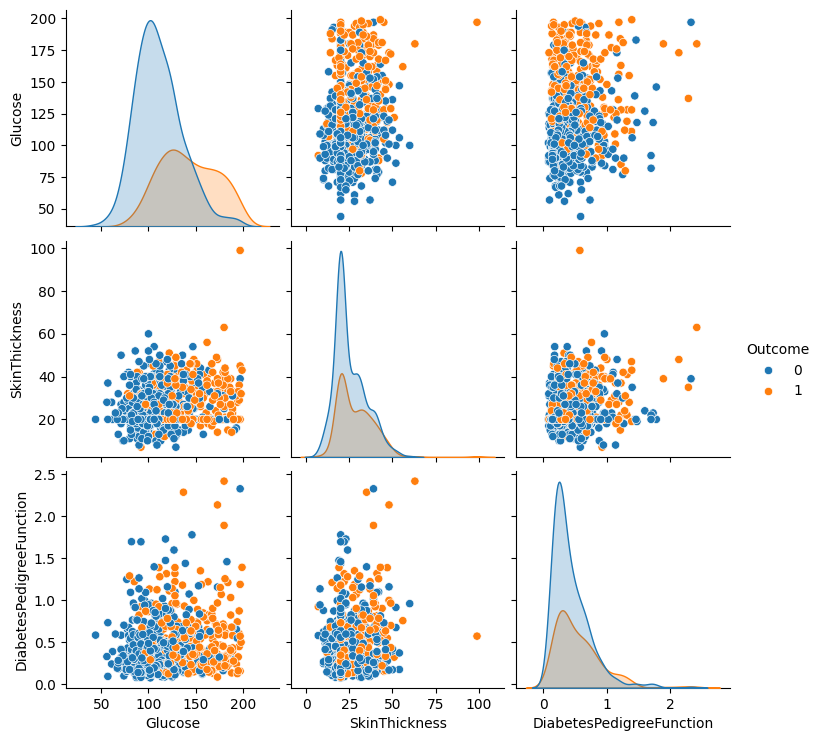

In [15]:
sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

The pairplot illustrates the relationship between 'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction' concerning the 'Outcome' variable, distinguishing between women with and without diabetes. From the analysis, several observations can be drawn:

There appears to be no significant correlation between the observed variables, as indicated by the scatterplots and distribution plots.
Comparing the distributions of 'DiabetesPedigreeFunction' and 'Glucose', we observe similar shapes, yet with differing frequencies. This suggests that there are more instances of women without diabetes, particularly evident in the 'Glucose' variable's distribution.
These conclusions provide insights into the relationship between the variables and their association with the presence or absence of diabetes in the dataset.

## Scatterplot between 'Glucose' and 'Insulin'

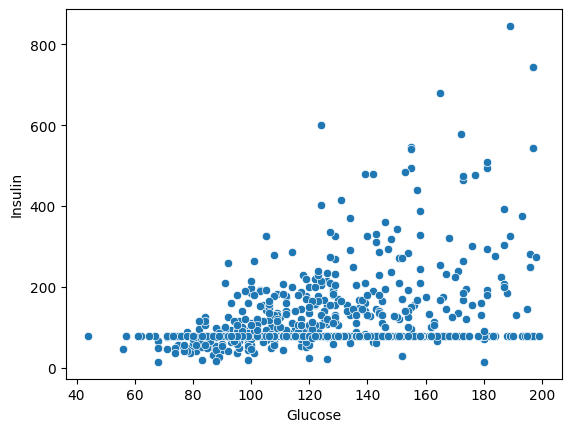

In [16]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

There is a positive correlation between 'Insulin' and 'Glucose'

## Boxplot for the 'Age' variable

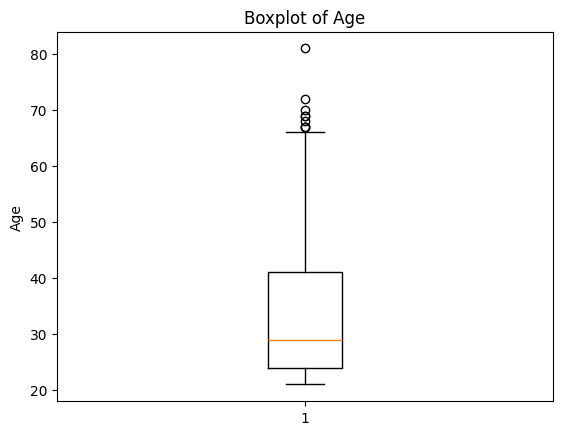

In [17]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

There are outliers for the 'Age' variable and they are located above the whiskers of the box plot. 


## Histograms for the 'Age' variable to understand the number of women in different age groups given whether they have diabetes or not. 

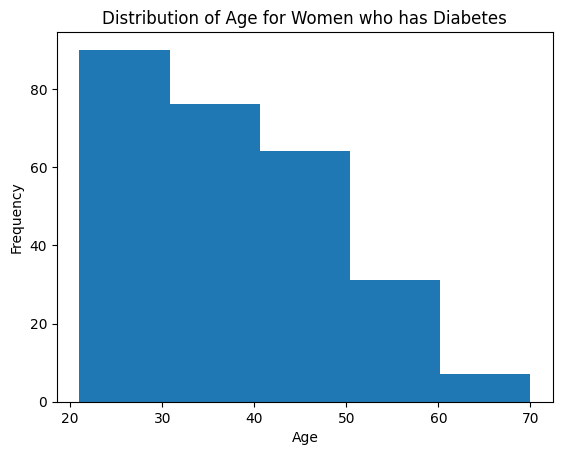

In [18]:
plt.hist(pima[pima['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

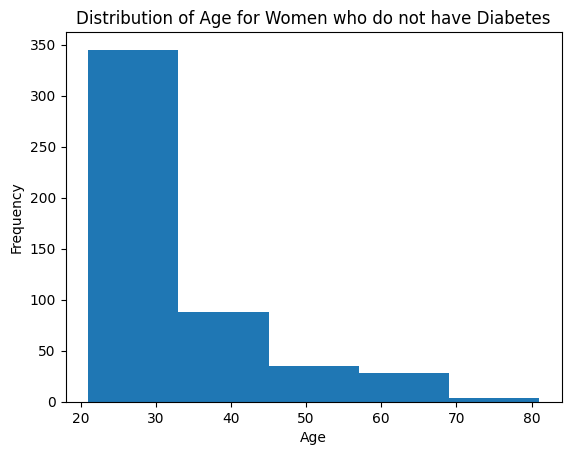

In [19]:
plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The first plot represents the women who have Diabetes and we can see that diabetes is present in every age group, but the majority of them are the youngest which means that women who are between 20 and 30 years old have the highest rate of diabetes

The second plot represents the women who do not have diabetes and we can see that compared to the rest of the age groups, the 20-30 group shows a steep increase in frequency. 

From the analysis of these plots, we can see that people in the population tend to develop diabetes in their 20s.


## The Interquartile Range of all the variables

In [20]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness               12.0000
Insulin                     48.2500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


A data set's IQR measures how widely distributed the data points are from the mean and the plot used to represent is the Boxplot 

## Correlation matrix

In [21]:
corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.021546,-0.033523,0.544341
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.231464,0.137158,0.266673
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.281222,0.000471,0.326791
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.532552,0.157196,0.020582
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.189919,0.158243,0.037676
BMI,0.021546,0.231464,0.281222,0.532552,0.189919,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.153508,1.000000,0.033561
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.025748,0.033561,1.000000


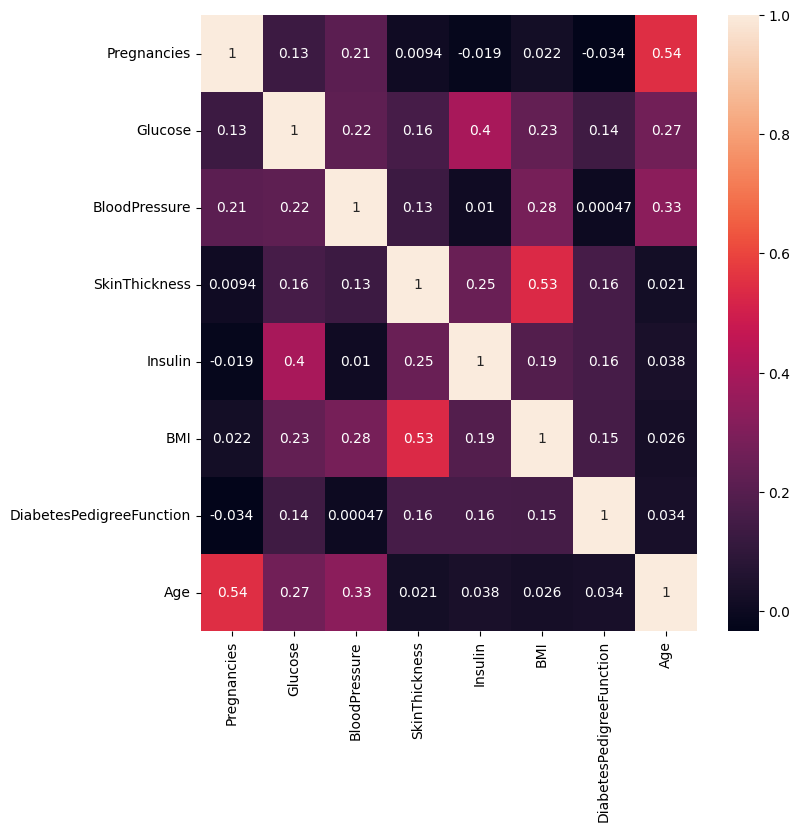

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

From the heatmap plot, we can see some variable's relationship:

There is a high correlation between Pregnancy and Age, SkinThickness and BMI.

The rest of the variables have little correlation and others do not correlate at all. 